In [129]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing

df_heart = pd.read_csv('heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:
#Добавляем признак для лиц старше 60 лет
df_heart['old'] = df_heart['age'].apply(lambda x: 1 if x>60 else 0)

In [131]:
# Добавляем признак нормы давления 
def trestbps(row):
    age, sex = row['age'], row['sex']
    if age <=20 and sex==1:
        return 123
    elif age >=21 and age <= 30 and sex ==1:
        return 126
    elif age >=31 and age <= 40 and sex ==1:
        return 129
    elif age >=41 and age <=50 and sex ==1:
        return 135
    elif age >=51  and sex == 1:
        return 142
    elif age <=20 and sex ==0:
        return 116
    elif age >=21 and age <= 30 and sex ==0:
        return 120
    elif age >=31 and age <= 40 and sex ==0:
        return 127
    elif age >=41 and age <=50 and sex ==0:
        return 137
    elif age >=51  and age <=60 and sex == 0:
        return 144
    elif age >=61 and sex ==0:
        return 159

df_heart['trestbps_mean'] = df_heart.apply(trestbps, axis=1)

In [132]:
# # Посмотрим типы данных
# print(df_heart.dtypes)
# print("\n" + "="*50 + "\n")

# Количество уникальных значений для каждого признака
print("Уникальные значения по признакам:")
for col in df_heart.columns:
    unique_count = df_heart[col].nunique()
    unique_values = sorted(df_heart[col].unique())
    print(f"{col}: {unique_count} уникальных значений - {unique_values}")

Уникальные значения по признакам:
age: 41 уникальных значений - [29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]
sex: 2 уникальных значений - [0, 1]
cp: 4 уникальных значений - [0, 1, 2, 3]
trestbps: 49 уникальных значений - [94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200]
chol: 152 уникальных значений - [126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 2

In [133]:
# Кодируем категориальные признаки (кроме бинарных)
categorical_features =['cp', 'restecg', 'slope', 'ca', 'thal', 'trestbps_mean']
encoder = ce.OneHotEncoder(cols = categorical_features, use_cat_names=True)
df_heart = encoder.fit_transform(df_heart)

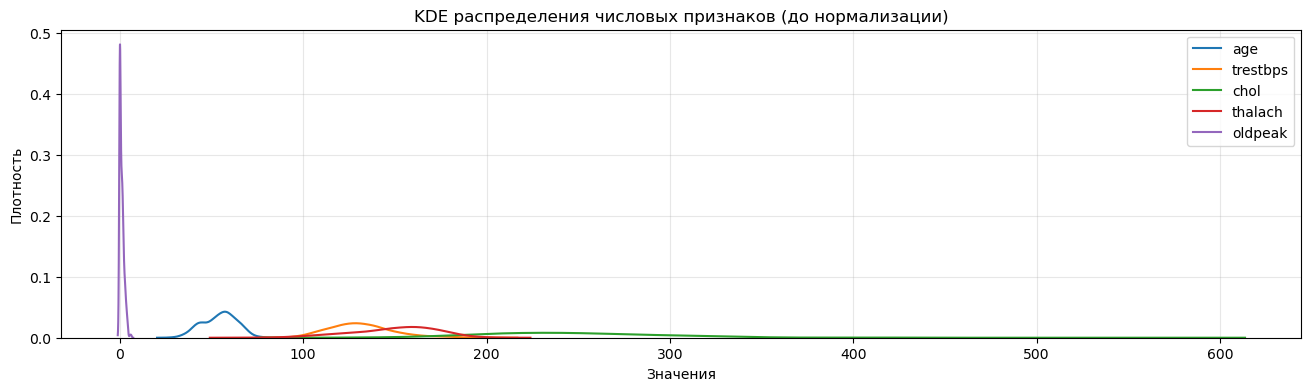

In [134]:
#Нормализация числовых признаков
numeric_features = ['age', 'trestbps','chol','thalach','oldpeak']

plt.figure(figsize=(16,4))
for feature in numeric_features:
    sns.kdeplot(data=df_heart, x=feature, label=feature)
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.title('KDE распределения числовых признаков (до нормализации)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [135]:
col_names = list(df_heart.columns)

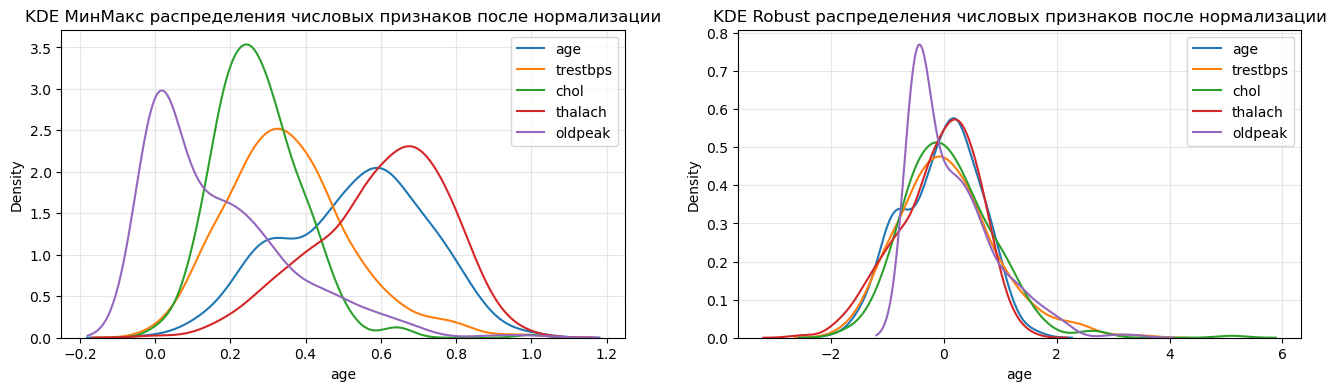

In [136]:
mm_scaler = preprocessing.MinMaxScaler()
df_heart_mm = mm_scaler.fit_transform(df_heart[numeric_features])
df_heart_mm = pd.DataFrame(df_heart_mm, columns=numeric_features)

rs_scaler = preprocessing.RobustScaler()
df_heart_rs = rs_scaler.fit_transform(df_heart[numeric_features])
df_heart_rs=pd.DataFrame(df_heart_rs,columns = numeric_features)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,4))
for scaled_feature in numeric_features:
    sns.kdeplot(data=df_heart_mm, x=scaled_feature, ax=ax1, label=scaled_feature)
ax1.set_title('KDE МинМакс распределения числовых признаков после нормализации')
ax1.legend()
ax1.grid(True, alpha=0.3)

for scaled_feature in numeric_features:
    sns.kdeplot(data=df_heart_rs, x=scaled_feature, ax=ax2, label=scaled_feature)
ax2.set_title('KDE Robust распределения числовых признаков после нормализации')
ax2.legend()
ax2.grid(True, alpha=0.3)



Как видно на kdeplot более оба метода нормализации могут подойти для дальнейшей работы, после нормализации масштабы сохранены. Для дальнейшего анализа, выбрана версия с RobustScaler нормализацией, так как она более устойчива к выбросам.

In [137]:
df_heart = df_heart.drop(columns=numeric_features, axis=1)
df_heart.columns

Index(['sex', 'cp_3.0', 'cp_2.0', 'cp_1.0', 'cp_0.0', 'fbs', 'restecg_0.0',
       'restecg_1.0', 'restecg_2.0', 'exang', 'slope_0.0', 'slope_2.0',
       'slope_1.0', 'ca_0.0', 'ca_2.0', 'ca_1.0', 'ca_3.0', 'ca_4.0',
       'thal_1.0', 'thal_2.0', 'thal_3.0', 'thal_0.0', 'target', 'old',
       'trestbps_mean_142.0', 'trestbps_mean_129.0', 'trestbps_mean_137.0',
       'trestbps_mean_144.0', 'trestbps_mean_135.0', 'trestbps_mean_159.0',
       'trestbps_mean_127.0', 'trestbps_mean_126.0'],
      dtype='object')

In [138]:
df_heart = pd.concat([df_heart, df_heart_rs], axis=1)

In [139]:
df_heart.describe()

,sex,cp_3.0,cp_2.0,cp_1.0,cp_0.0,fbs,restecg_0.0,restecg_1.0,restecg_2.0,exang,...,trestbps_mean_144.0,trestbps_mean_135.0,trestbps_mean_159.0,trestbps_mean_127.0,trestbps_mean_126.0,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.075908,0.287129,0.165017,0.471947,0.148515,0.485149,0.501650,0.013201,0.326733,...,0.115512,0.178218,0.112211,0.016502,0.003300,-0.046938,0.081188,0.098646,-0.103173,0.149752
std,0.466011,0.265288,0.453171,0.371809,0.500038,0.356198,0.500606,0.500824,0.114325,0.469794,...,0.320167,0.383329,0.316148,0.127605,0.057448,0.672748,0.876907,0.816232,0.704774,0.725672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.444444,0.500000,0.543307,0.400000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.629630,3.500000,5.102362,1.507692,3.375000


<Axes: >

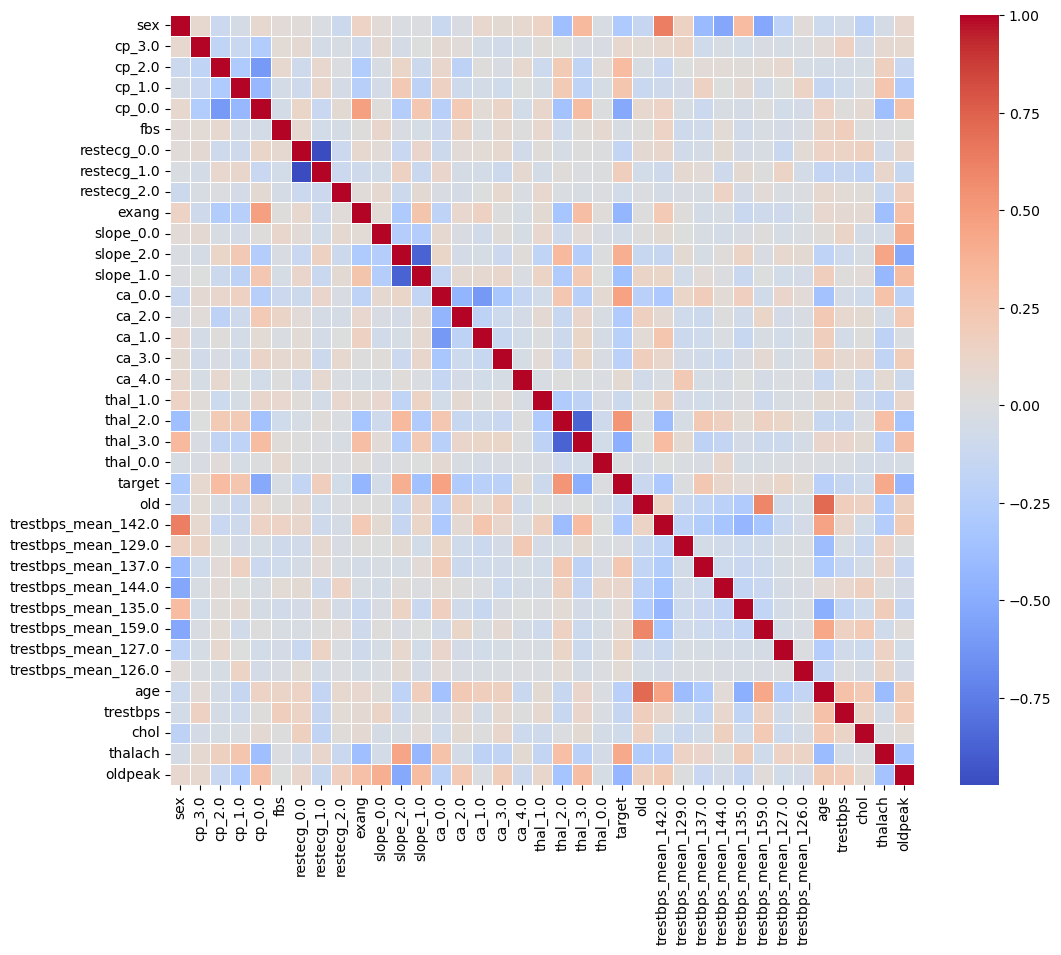

In [149]:
#Корреляционный анализ признаков
plt.figure(figsize=(12, 10))
correlation_matrix = df_heart.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)

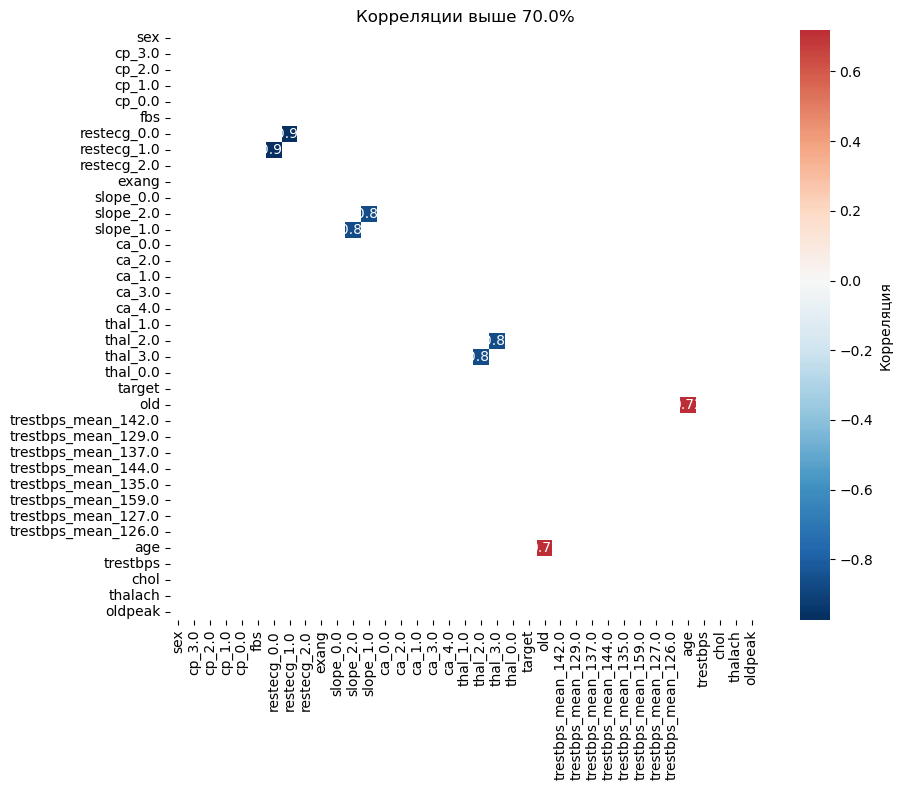

In [151]:
#Признаки с высокой корреляцией
correlation_matrix = df_heart.select_dtypes(include=[np.number]).corr()

threshold = 0.7
high_corr = correlation_matrix[abs(correlation_matrix) > threshold]

high_corr = high_corr.where(~np.eye(high_corr.shape[0], dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, cbar_kws={'label': 'Корреляция'})
plt.title(f'Корреляции выше {threshold*100}%')
plt.tight_layout()
plt.show()

Как видно на диаграмме признаков с высокой корреляции, в дата сете имеются признаки с высокой корреляции свыше 70%. Данные признаки необходимо изучить дополнительно, при необходимости объединить в один признак или удалить наименее важный.